In [98]:
import EoN
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## SIR 모형 연구
### 주제 1 ) 네트워크 모델(ER vs BA)에 따른 전염병 확산 연구
> #### 실험 세팅 : 독립, 종속, 통제 변인을 적절하게 설정
> #### - 독립 변인 = 네트워크 모델
> #### - 종속 변인 = 보고 싶은 차이 (ex. 감염이 가장 많을 때 or 모두 회복될 때 까지 걸리는 시간 차이)
> #### - 통제 변인 = 네트워크 크기, 감염을 시작하는 노드 등 독립 변인 외 종속 변인에 영향을 줄 만한 조건들

### 1. 네트워크 생성

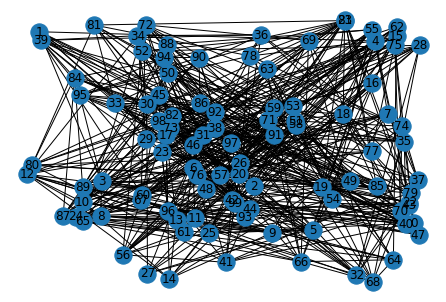

In [207]:
# 비교를 위해 네트워크의 크기를 맞춰준다 (ex. 노드와 링크의 개수를 비슷하게 하기)
# WS : link 개수 = N*k/2
# BA : link 개수 = N*m

N = 100
k = 10
p = 0.2
m = 5

WS = nx.watts_strogatz_graph(N, k, p)
BA = nx.barabasi_albert_graph(N, m)
    
pos = nx.random_layout(WS)
nx.draw(WS, pos=pos, with_labels=True)

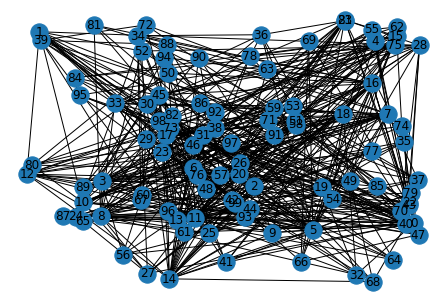

In [208]:
nx.draw(BA, pos=pos, with_labels=True)

### 2. 네트워크 분석

In [209]:
# number_of_nodes, number_of_edges

print(WS.number_of_nodes(), BA.number_of_nodes())
print(WS.number_of_edges(), BA.number_of_edges())

100 100
500 475


In [210]:
# average degree

average_degree_WS = 2*len(WS.edges())/len(WS.nodes())
average_degree_BA = 2*len(BA.edges())/len(BA.nodes())
print(average_degree_WS, average_degree_BA)

print(nx.average_clustering(WS), nx.average_clustering(BA))
print(nx.average_shortest_path_length(WS), nx.average_shortest_path_length(BA))

10.0 9.5
0.3696116106116105 0.18250212330258495
2.4486868686868686 2.212121212121212


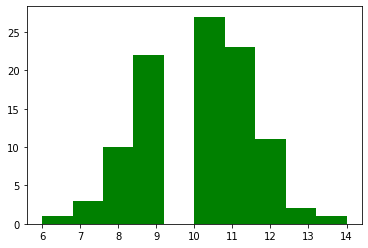

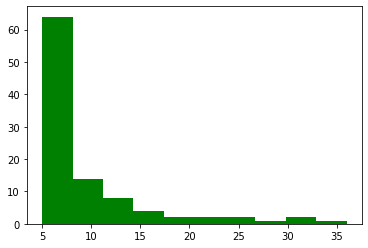

In [212]:
# degree distribution
WS_degree = dict(WS.degree())
BA_degree = dict(BA.degree())

plt.hist(WS_degree.values(), bins = 10, color='g')
plt.show()
plt.hist(BA_degree.values(), bins = 10, color='g')
plt.show()

In [213]:
nx.average_node_connectivity(WS)

9.20040404040404

In [222]:
WS.degree()

DegreeView({0: 11, 1: 9, 2: 10, 3: 13, 4: 12, 5: 11, 6: 11, 7: 10, 8: 9, 9: 11, 10: 11, 11: 9, 12: 12, 13: 11, 14: 9, 15: 10, 16: 9, 17: 10, 18: 9, 19: 9, 20: 11, 21: 11, 22: 12, 23: 11, 24: 10, 25: 9, 26: 11, 27: 7, 28: 11, 29: 8, 30: 10, 31: 7, 32: 11, 33: 12, 34: 9, 35: 10, 36: 8, 37: 10, 38: 9, 39: 11, 40: 9, 41: 10, 42: 10, 43: 8, 44: 11, 45: 8, 46: 10, 47: 10, 48: 11, 49: 8, 50: 11, 51: 10, 52: 10, 53: 11, 54: 9, 55: 11, 56: 13, 57: 10, 58: 12, 59: 10, 60: 11, 61: 9, 62: 9, 63: 10, 64: 10, 65: 10, 66: 12, 67: 9, 68: 10, 69: 8, 70: 9, 71: 11, 72: 11, 73: 12, 74: 9, 75: 8, 76: 10, 77: 10, 78: 8, 79: 10, 80: 9, 81: 10, 82: 9, 83: 12, 84: 10, 85: 10, 86: 8, 87: 10, 88: 6, 89: 12, 90: 9, 91: 11, 92: 8, 93: 12, 94: 11, 95: 12, 96: 9, 97: 7, 98: 9, 99: 14})

In [223]:
BA.degree()

DegreeView({0: 31, 1: 15, 2: 5, 3: 20, 4: 8, 5: 32, 6: 36, 7: 26, 8: 20, 9: 8, 10: 16, 11: 26, 12: 15, 13: 23, 14: 27, 15: 14, 16: 23, 17: 17, 18: 12, 19: 7, 20: 13, 21: 13, 22: 10, 23: 10, 24: 11, 25: 9, 26: 14, 27: 9, 28: 14, 29: 10, 30: 9, 31: 8, 32: 7, 33: 14, 34: 12, 35: 6, 36: 8, 37: 8, 38: 7, 39: 9, 40: 11, 41: 7, 42: 9, 43: 8, 44: 7, 45: 11, 46: 6, 47: 8, 48: 8, 49: 7, 50: 5, 51: 6, 52: 5, 53: 6, 54: 6, 55: 8, 56: 6, 57: 6, 58: 9, 59: 7, 60: 5, 61: 5, 62: 6, 63: 5, 64: 6, 65: 7, 66: 6, 67: 9, 68: 6, 69: 5, 70: 5, 71: 5, 72: 5, 73: 5, 74: 7, 75: 10, 76: 6, 77: 5, 78: 5, 79: 5, 80: 6, 81: 5, 82: 6, 83: 6, 84: 5, 85: 5, 86: 6, 87: 5, 88: 5, 89: 5, 90: 5, 91: 5, 92: 5, 93: 5, 94: 5, 95: 5, 96: 5, 97: 5, 98: 5, 99: 5})

## 3. EoN Module 활용

In [269]:
# 감염률 beta, 회복률 gamma
beta = 0.3
gamma = 0.5
first_I = [9,12,15]

WS_sim = EoN.fast_SIR(WS, beta, gamma, initial_infecteds=first_I, return_full_data=True, tmax=30)
BA_sim = EoN.fast_SIR(BA, beta, gamma, initial_infecteds=first_I, return_full_data=True, tmax=30)

(<AxesSubplot:>,
 [<AxesSubplot:title={'center':'$S$, $I$, $R$'}, xlabel='$t$'>])

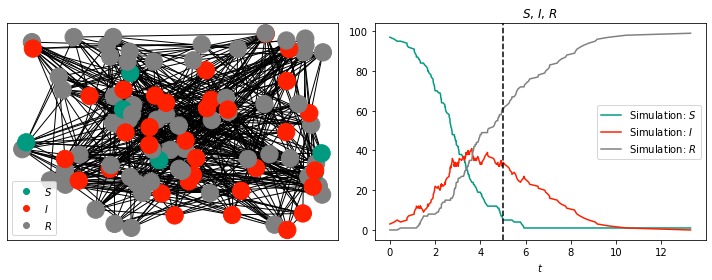

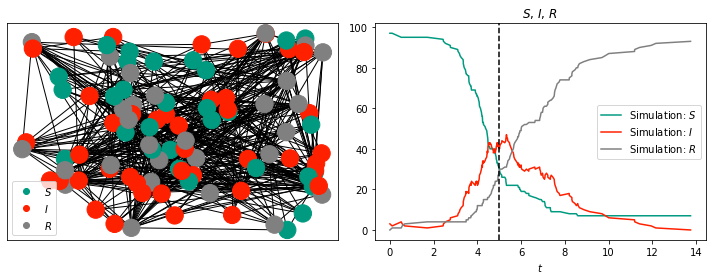

In [270]:
WS_sim.display(5, ts_plots=["SIR"], pos=pos)
BA_sim.display(5, ts_plots=["SIR"], pos=pos)

In [245]:
WS_sim = WS_sim.sim_update_label(["Hi", "Hello", "안녕"])
WS_sim.display(5)

AttributeError: 'NoneType' object has no attribute 'display'

### [ 추가 내용 ]
#### 1. 색 변경

(<AxesSubplot:>,
 [<AxesSubplot:title={'center':'$S$, $I$, $R$'}, xlabel='$t$'>])

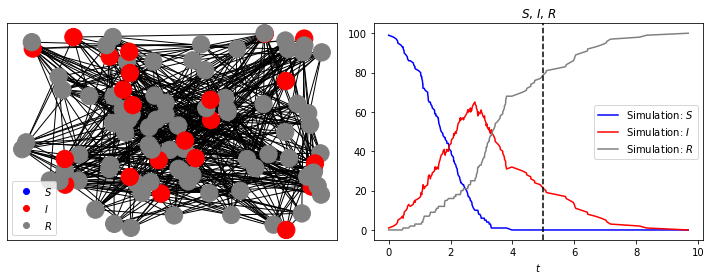

In [276]:
color_dict = {'S': 'blue','I':'red', 'R':'gray'}
sim_kwargs = {'color_dict':color_dict, 'pos':pos}

color_change = EoN.fast_SIR(WS, beta, gamma, return_full_data=True, sim_kwargs=sim_kwargs)
color_change.display(5, ts_plots=["SIR"])

#### 2. 크기 변경

(<AxesSubplot:>,
 [<AxesSubplot:title={'center':'$S$, $I$, $R$'}, xlabel='$t$'>])

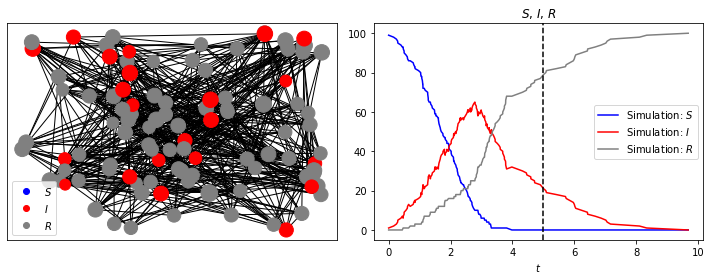

In [280]:
node_size = [ degree*20 for node, degree in WS.degree()]

color_change.display(5, ts_plots=["SIR"], node_size=node_size)

### 심화 내용 : SIR model 변경

In [299]:
# node_attribute_dict = {node: 1 for node in WS.nodes()}
# edge_attribute_dict = {edge: 1 for edge in WS.edges()}

# nx.set_node_attributes(WS, values=node_attribute_dict, name='expose2infect_weight')
# nx.set_edge_attributes(WS, values=edge_attribute_dict, name='transmission_weight')

H = nx.DiGraph()
H.add_edge('E', 'I', rate = beta)
H.add_edge('I', 'R', rate = beta)

J = nx.DiGraph()
J.add_edge(('I', 'S'), ('I', 'E'), rate = gamma)

# r can be s by mutation
H = nx.DiGraph()
H.add_edge('R', 'S', rate = beta)
H.add_edge('I', 'R', rate = beta)

J = nx.DiGraph()
J.add_edge(('I', 'S'), ('I', 'I'), rate = gamma)


IC = {}
for node in WS.nodes():
    if node in first_I:
        IC[node] = 'I'
    else:
        IC[node] = 'S'

return_statuses = ('S', 'I', 'R')

sim = EoN.Gillespie_simple_contagion(WS, H, J, IC, return_statuses, tmax = 30, return_full_data=True)

(<AxesSubplot:>,
 [<AxesSubplot:title={'center':'$S$, $I$, $R$'}, xlabel='$t$'>])

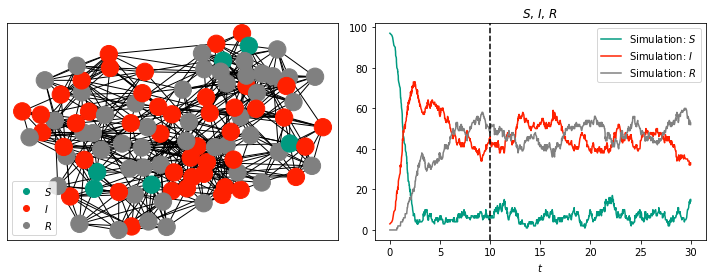

In [300]:
sim.display(10, ts_plots=[return_statuses])